# Boston House Pricing Predicition

## Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

## 1) Problem statement
- In this project, we will develop and evaluate the performance and the predictive power of a model trained and tested on data collected from houses in Boston’s suburbs.
- Once we get a good fit, we will use this model to predict the monetary value of a house located at the Boston’s area.
- A model like this would be very valuable for a real state agent who could make use of the information provided in a dayly basis.

## 2) Data Collection
*- Dataset Source:* - https://github.com/selva86/datasets/blob/master/BostonHousing.csv

## 2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Import the CSV Dataset "Boston House Pricing Dataset" as Pandas DataFrame**

In [10]:
df = pd.read_csv('data/BostonHousing.csv')

*Show Top 5 Records*

In [11]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [13]:
df.shape

(506, 14)

## 2.2 Dataset information
Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's


## 3. Data Checks to perform
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

## 3.1 Check Missing values

In [15]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

**There are no missing values in the data set**

## 3.2 Check Duplicates

In [16]:
df.duplicated().sum()

0

**There are no duplicates values in the data set**

## 3.3 Check data types

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


## 3.4 Checking the number of unique values of each column

In [18]:
df.nunique()

crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
b          357
lstat      455
medv       229
dtype: int64

## 3.5 Check statistics of data set

In [19]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Insight-
        :From above description of numerical data:
                - The rate of crime is almost around 9 per capita by town.
                - NOX concentration is around 0.55 parts per million.
                - There is approx 6 rooms per dwelling.
                - Average distance between five Boston employment centers is approx around 4 km.
                - Lower Status of population percentage is nearly 13%.
                - The median value of owner-occupied homes in $1000's ranges from 5 to 50.

## 4 Exploring Data (Visulaization)

<Axes: >

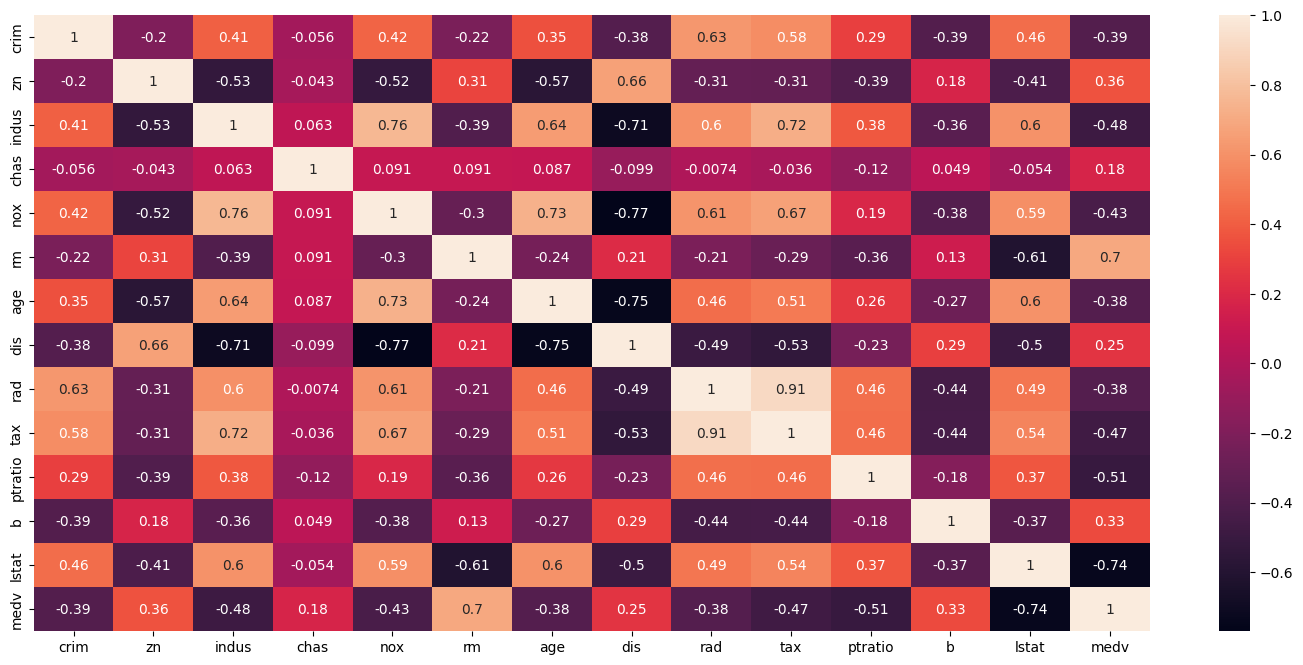

In [23]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(), annot=True)

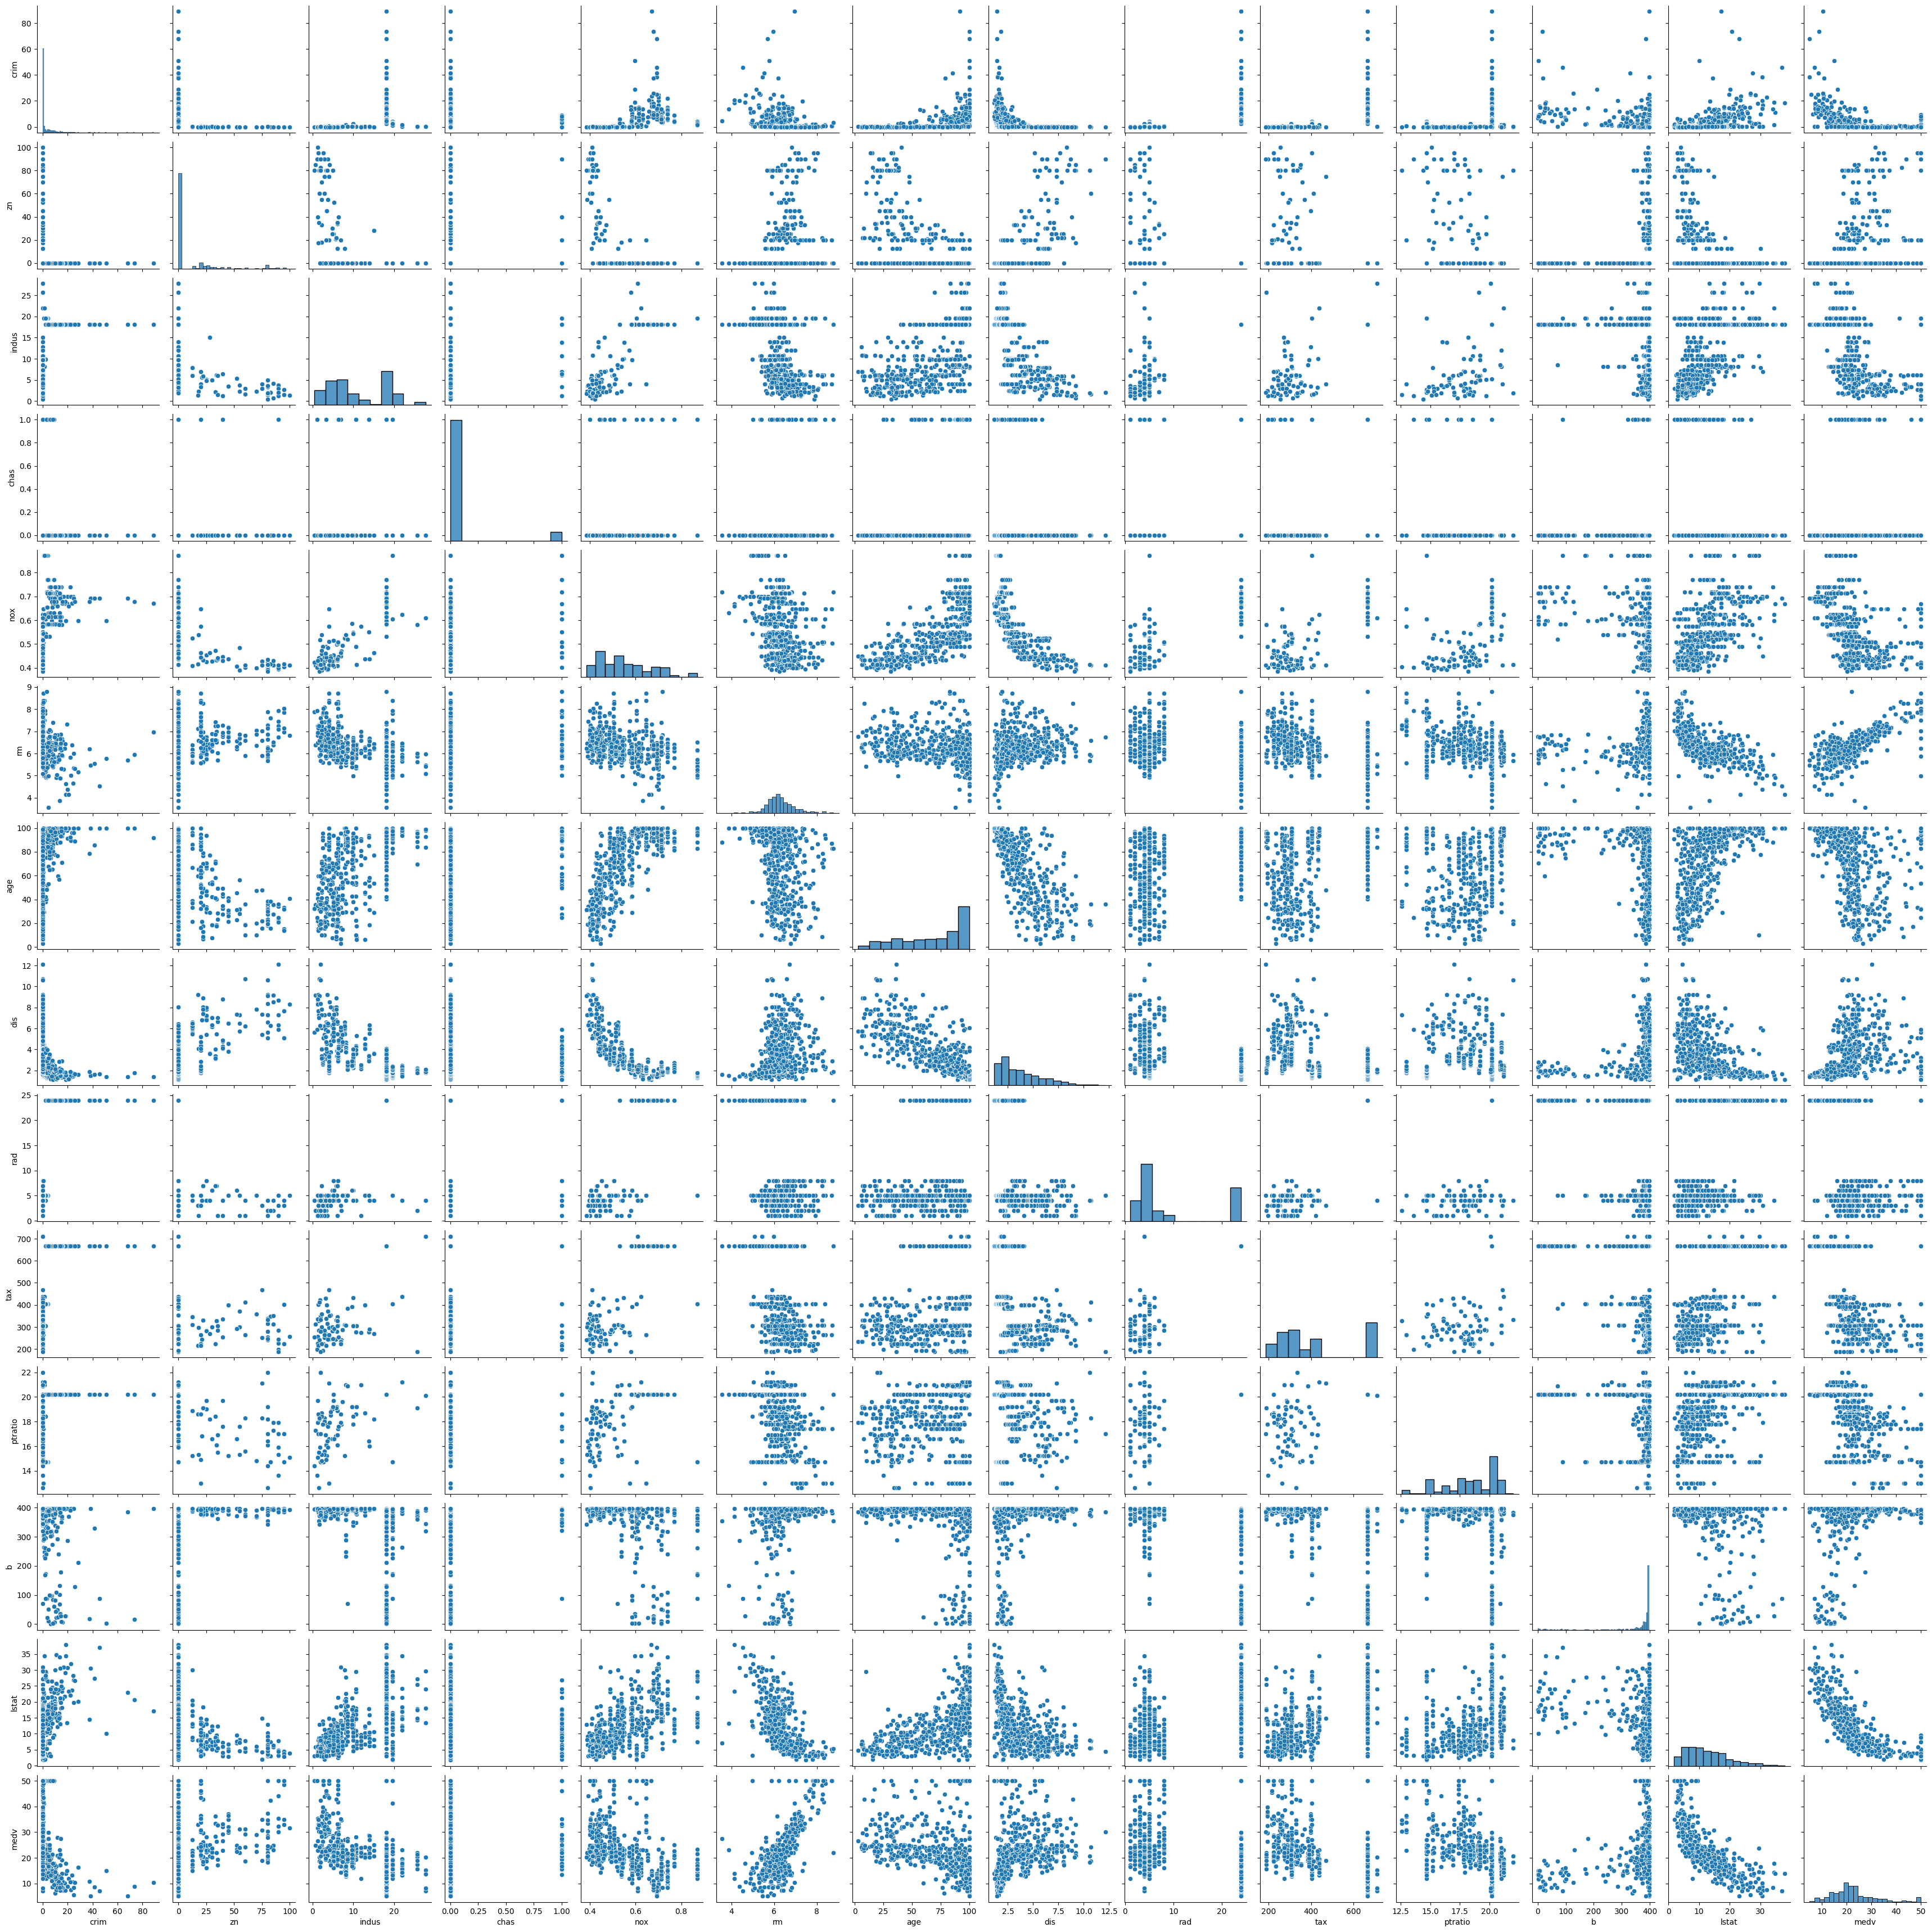

In [24]:
sns.pairplot(df)

Text(0, 0.5, 'Price')

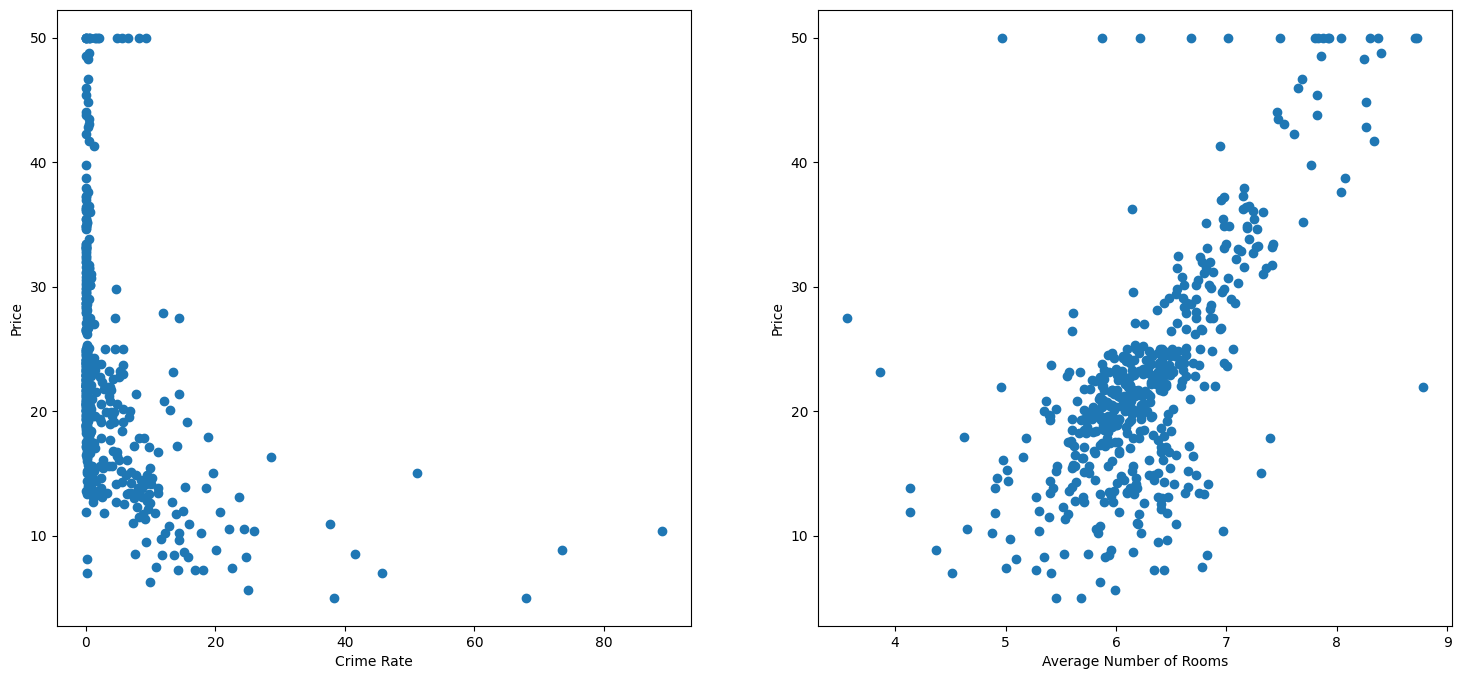

In [26]:
plt.figure(figsize=(18,8))
plt.subplot(121)
plt.scatter(df['crim'],df['medv'])
plt.xlabel("Crime Rate")
plt.ylabel("Price")
plt.subplot(122)
plt.scatter(df['rm'],df['medv'])
plt.xlabel("Average Number of Rooms")
plt.ylabel("Price")

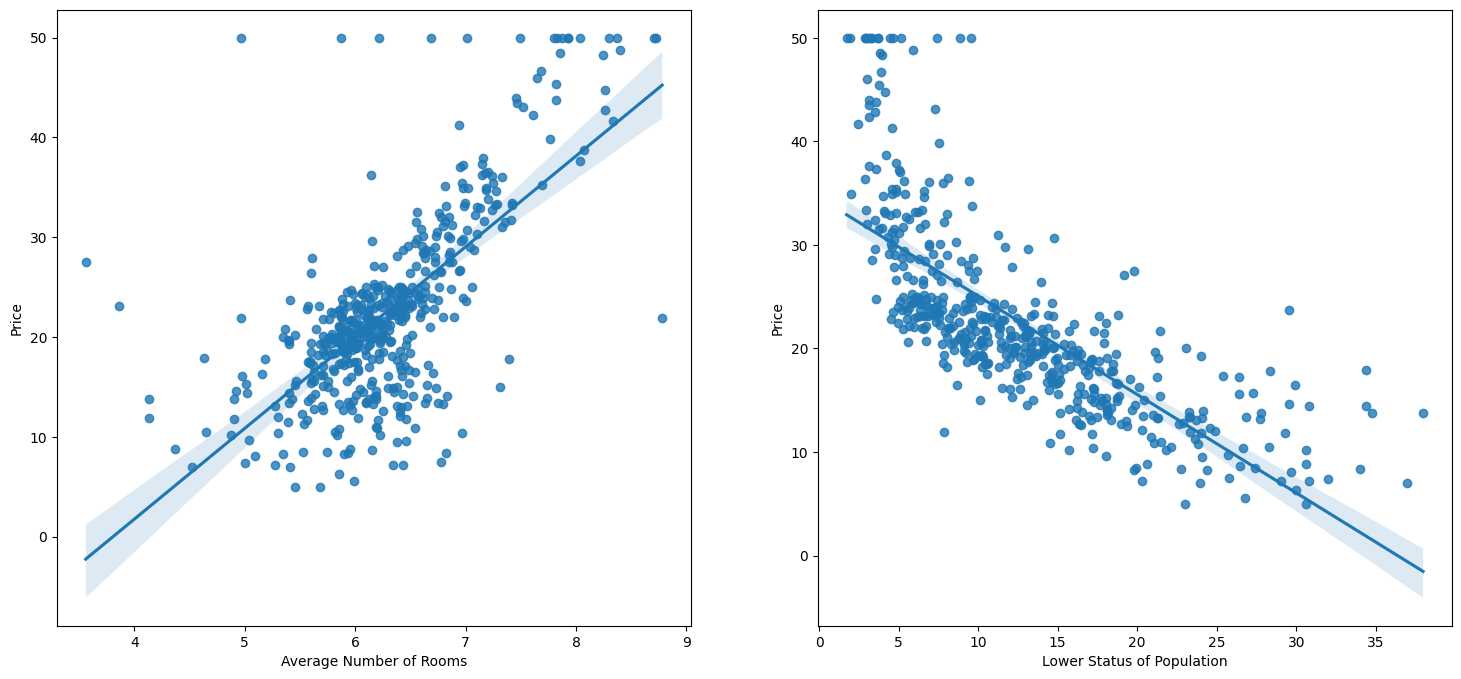

In [46]:
plt.figure(figsize=(18,8))

plt.subplot(121)
sns.regplot(x='rm',y='medv',data=df)
plt.xlabel("Average Number of Rooms")
plt.ylabel("Price")

plt.subplot(122)
sns.regplot(x='lstat',y='medv',data=df)
plt.xlabel("Lower Status of Population")
plt.ylabel("Price")

plt.show()

Text(0, 0.5, 'Price')

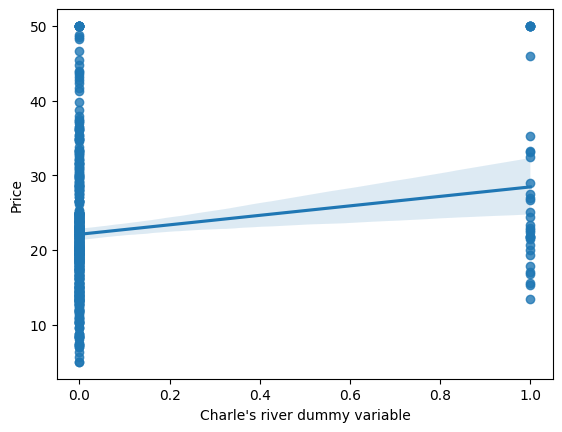

In [54]:
sns.regplot(x="chas",y="medv",data=df)
plt.xlabel("Charle's river dummy variable")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

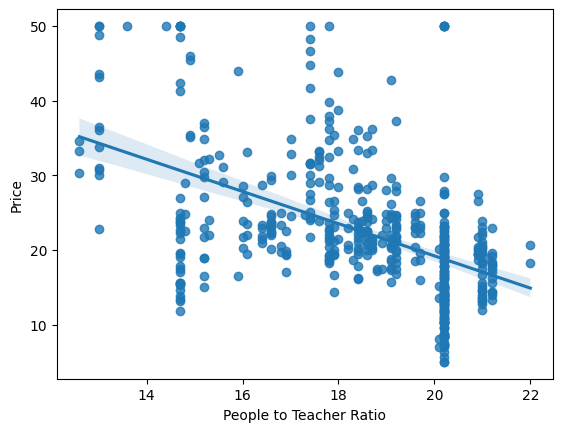

In [49]:
sns.regplot(x="ptratio",y="medv",data=df)
plt.xlabel("People to Teacher Ratio")
plt.ylabel("Price")

## 4.2 CHECKING OUTLIERS

In [57]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

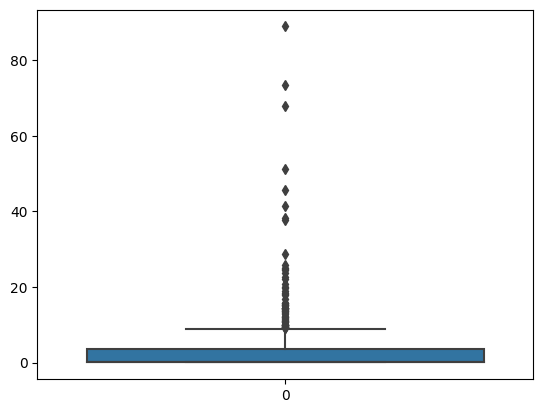

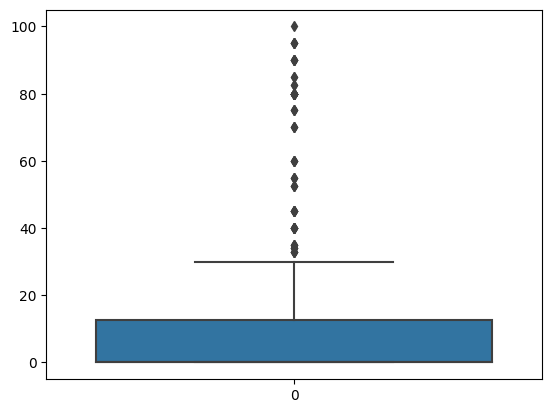

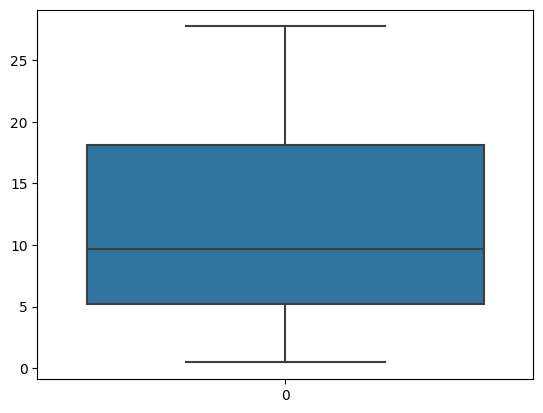

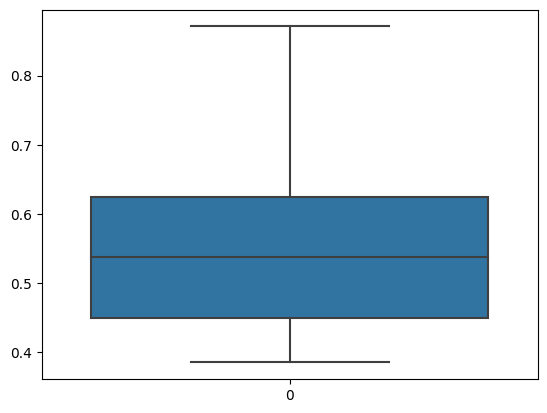

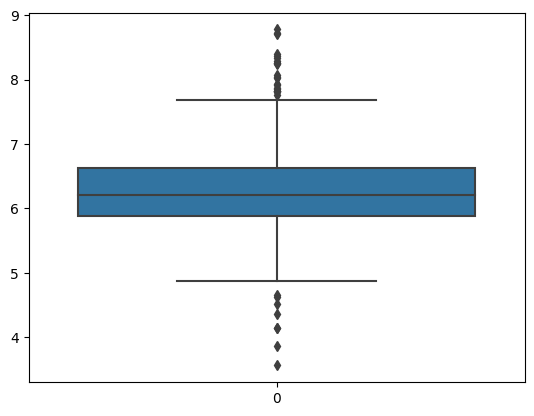

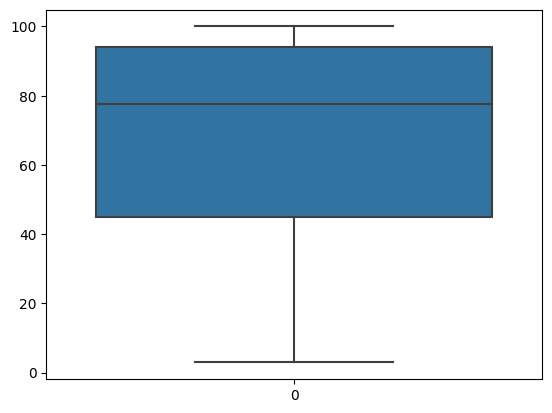

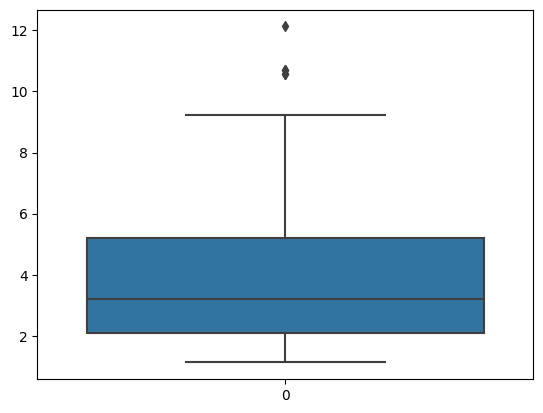

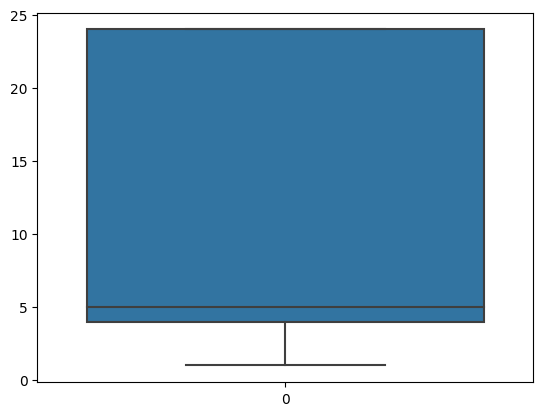

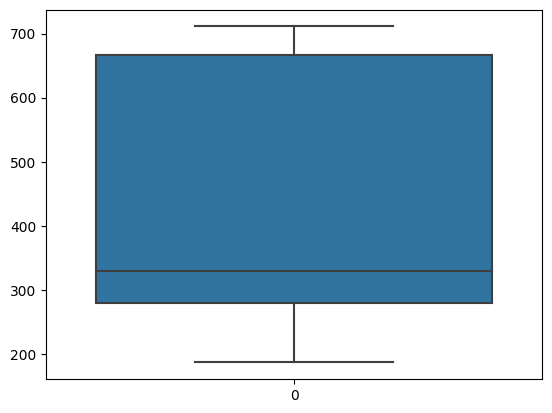

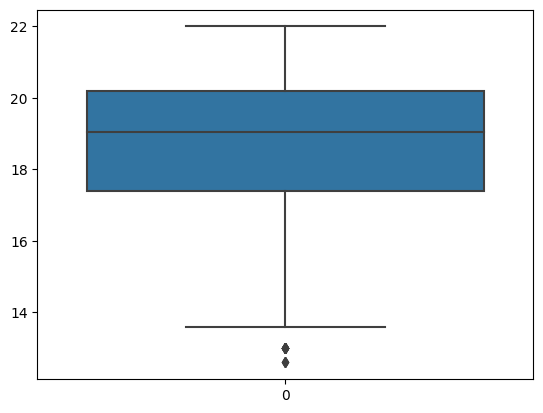

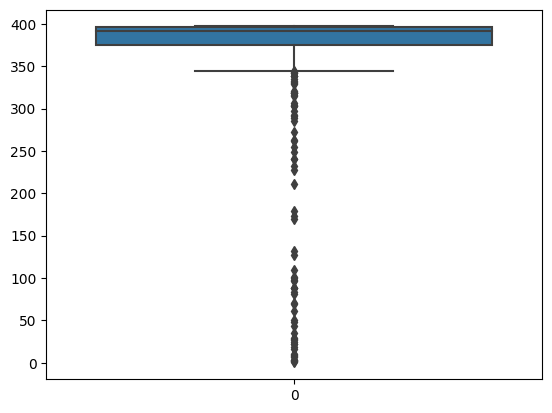

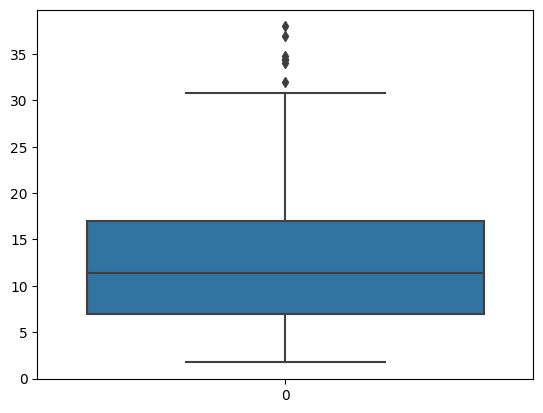

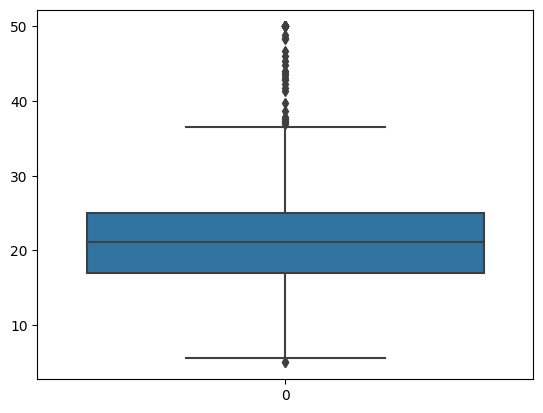

In [59]:
for i in  df.columns:
    if i != 'chas':
        sns.boxplot(df[i])
        plt.show()